# Exploratory data analysis


**Dataset: 2,894 Facebook posts annotated with scores for valence and arousal**


Preoţiuc-Pietro, D., Schwartz, H. A., Park, G., Eichstaedt, J., Kern, M., Ungar, L., & Shulman, E. (2016): Modelling valence and arousal in facebook posts. In Proceedings of the 7th workshop on computational approaches to subjectivity, sentiment and social media analysis (pp. 9-15).

Dimensonal Emotion model based on the circumplex model (valence and arousal) by James A. Russell (1980): A Circumplex Model of Affect. Journal of Personality and Social Psychology (39,6:1161–1178).

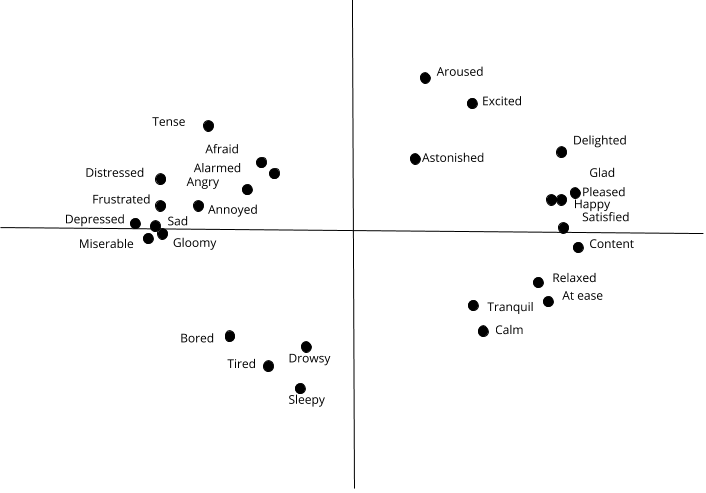

In [1]:
from IPython.display import Image
Image("russell.png", width=500, height=500)

## General corpus analysis 

- Number of observations – number of annotated examples in the dataset

### Row level

- Word count – number of words per observation
- Stop word count – number of stop words per observation
- Unique word count – number of unique words per observation
- URL count – number of urls per observation
- Mean word length – the  average word length (in characters) per observation
- Char count - number of characters per observation 
- Punctuation count – number of punctuations per observation
- Hashtag count – number of hashtags # per observation
- Mention count – number of user mentions @ per observation

### Corpus level

- Word count – number of words in the dataset
- Stop word count – number of stop words in the dataset
- Word count without stop words – number of words in the dataset excluding stop words
- Unique word count – number of unique words in the dataset
- Punctuation count – number of punctuations in the dataset
- User count – number of user mentions @ in the dataset
- Hashtag count – number of hashtags # in the dataset
- URL count – number of urls in the dataset
- Mean sequence len – the  average  observation  length  with  respect  to  all observations in the corpus


## Classes and scores

- Classes and scores – distribution and imbalance check

## Lexical analysis 

- N-gram frequency – number of unigrams, bigrams, trigrams
- Verbs
- Adjectives
- NER (random sample)
- Depenency grammar (random sample)
- Emotion words – occurrence of emotion words in the dataset based on a selected emotion lexicon
- LDA

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

import re
import string

import matplotlib.pyplot as plt
from wordcloud import STOPWORDS


SEED = 42

In [4]:
DIR = 'data/'
DATA = 'facebook/facebook.csv'

In [5]:
data = pd.read_csv(DIR + DATA, encoding='utf8')

print(f'Dataset Shape = {data.shape}')
print(f'Dataset Memory Usage = {(data.memory_usage().sum() / 1024**2):.2f} MB')


Dataset Shape = (2895, 5)
Dataset Memory Usage = 0.11 MB


### Missing values

In [8]:
data.isna().values.any()

True

In [9]:
data.isna().sum()

Anonymized Message    1
Valence1              0
Valence2              0
Arousal1              0
Arousal2              0
dtype: int64

In [10]:
data[data.isna().any(axis=1)]

,Anonymized Message,Valence1,Valence2,Arousal1,Arousal2
70,NaN,6,6,3,1


In [11]:
data = pd.DataFrame.dropna(data)
data.isna().values.any()

False

In [12]:
data.describe()

,Valence1,Valence2,Arousal1,Arousal2
count,2894.000000,2894.000000,2894.000000,2894.000000
mean,5.274015,5.250173,3.363856,3.343124
std,1.042098,1.485600,1.958775,2.183769
min,2.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,2.000000,1.000000
50%,5.000000,5.000000,3.000000,3.000000
75%,6.000000,6.000000,5.000000,5.000000
max,9.000000,9.000000,9.000000,9.000000


## General corpus analysis 

- Number of observations – number of annotated examples in the dataset

### Row level

- Word count – number of words per observation
- Stop word count – number of stop words per observation
- Unique word count – number of unique words per observation
- URL count – number of urls per observation
- Mean word length – the  average word length (in characters) per observation
- Char count - number of characters per observation 
- Punctuation count – number of punctuations per observation
- Hashtag count – number of hashtags # per observation
- Mention count – number of user mentions @ per observation

In [13]:
print(f'Dataset: {len(data)} observations')

Dataset: 2894 observations


In [14]:
TEXT = 'Anonymized Message'

In [17]:
data[TEXT][:10]

0    We'll be off and running to a lil' place calle...
1                             I really wana move soon!
2                              thinking at charity cup
3    thinks that for girls, boys are easily found. ...
4                   Our Wedding Anniversary tonight...
5           Just sip some crystal with these real ones
6    Believe The Hype for Raleigh! Snip3down is goi...
7    I would like to thank all of my family and fri...
8    Holy shit... Still playing with go to meeting....
9                        So happy <PERSON> is the bomb
Name: Anonymized Message, dtype: object

In [20]:
txt_array = data[TEXT].values

In [51]:
def exact_keyword_search(document, keyword, keyword_observations = None):
    
    ''' Takes a (1) document (list) and (2) a keyword (string) as input, returns
    total number of keywords in the document and the total number of observations
    that include the keyword.
    
    Optional: The third argument keyword_observations is optional and the default
    is set to None. If you'd like to return the list of observations that include
    the keyword for further analysis, please inititialize an empty list and add
    the variable as the third argument.
    
    Note: This is an exact keyword search, the keyword has to be independent and
    whitespace seperated to be extracted and counted.'''

    if keyword_observations == None:
        keyword_observations = []
    else:
        keyword_observations = keyword_observations

    count = 0

    for i in range(0,len(document)):
        txt = document[i].split()
        if keyword in txt:
            keyword_observations.append(data.iloc[i]) 
        for token in txt:
            if token == keyword:
                count += 1

    print(f'Keyword: \'{keyword}\'')
    print(f'Total count: Appears {count} times in {len(keyword_observations)} observations.')

In [35]:
exact_keyword_search(txt_array, '<PERSON>')

Keyword: '<PERSON>'
Total count: Appears 151 times in 125 observations.


In [52]:
love = []

exact_keyword_search(txt_array, 'love', love)

Keyword: 'love'
Total count: Appears 117 times in 105 observations.


In [58]:
print(love[0][0])
print(' ')
print(love[0])

len(love)

I would like to thank all of my family and friends that came out and celebrated as well as  showered my new lil man with love and gifts. It was great! O how I love my family and friends.
 
Anonymized Message    I would like to thank all of my family and fri...
Valence1                                                              8
Valence2                                                              9
Arousal1                                                              6
Arousal2                                                              5
Name: 7, dtype: object


105

## Corpus analysis

### Row level

- Word count – number of words per observation
- Stop word count – number of stop words per observation
- Unique word count – number of unique words per observation
- URL count – number of urls per observation
- Mean word length – the  average word length (in characters) per observation
- Char count - number of characters per observation 
- Punctuation count – number of punctuations per observation
- Hashtag count – number of hashtags # per observation
- Mention count – number of user mentions @ per observation


In [59]:
#word_count
data['word_count'] = data[TEXT].apply(lambda x: len(str(x).split()))

# stop_word_count
data['stop_word_count'] = data[TEXT].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# unique_word_count
data['unique_word_count'] = data[TEXT].apply(lambda x: len(set(str(x).split())))

# url_count
data['url_count'] = data[TEXT].apply(lambda x: len([w for w in str(x).split() if (re.findall(r'<URL>', w))]))

# mean_word_length
data['mean_word_length'] = data[TEXT].apply(lambda x: np.round(np.mean([len(w) for w in str(x).split()])))

# char_count
data['char_count'] = data[TEXT].apply(lambda x: len(str(x)))

# punctuation_count
data['punct_count'] = data[TEXT].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
data['hashtag_count'] = data[TEXT].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
data['mention_count'] = data[TEXT].apply(lambda x: len([w for w in str(x).split() if (re.findall(r'<PERSON>', w))]))

In [62]:
data.head(2)

,Anonymized Message,Valence1,Valence2,Arousal1,Arousal2,word_count,stop_word_count,unique_word_count,url_count,mean_word_length,char_count,punct_count,hashtag_count,mention_count
0,We'll be off and running to a lil' place calle...,9,9,8,8,15,7,15,0,4.0,80,7,0,0
1,I really wana move soon!,4,5,5,7,5,1,5,0,4.0,24,1,0,0


In [69]:
data[[TEXT, 'word_count']].head(5)

,Anonymized Message,word_count
0,We'll be off and running to a lil' place calle...,15
1,I really wana move soon!,5
2,thinking at charity cup,4
3,"thinks that for girls, boys are easily found. ...",15
4,Our Wedding Anniversary tonight...,4


#### Threshold – observations based on word count

In [72]:
tokens16 = []
tokens30 = []
tokens60 = []
tokens90 = []
    
for i in range(0,len(data)):
    if data['word_count'].iloc[i] > 16:
        tokens16.append(data.iloc[i])
    if data['word_count'].iloc[i] > 30:
        tokens30.append(data.iloc[i])
    if data['word_count'].iloc[i] > 60:
        tokens60.append(data.iloc[i])
    if data['word_count'].iloc[i] > 90:
        tokens90.append(data.iloc[i])

In [73]:
print(len(tokens16))
print(len(tokens30))
print(len(tokens60))
print(len(tokens90))

980
381
72
1


In [76]:
tokens90[0][0]

'I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA I H8 HA.......\tLOL, gud tymzz nat:):)'

## General corpus analysis

### Corpus level

- Word count – number of words in the dataset
- Stop word count – number of stop words in the dataset
- Word count without stop words – number of words in the dataset excluding stop words
- Unique word count – number of unique words in the dataset
- Punctuation count – number of punctuations in the dataset
- User count – number of user mentions @ in the dataset
- Hashtag count – number of hashtags # in the dataset
- URL count – number of urls in the dataset
- Mean sequence len – the  average  observation  length  with  respect  to  all observations in the corpus


In [77]:
word_count = data['word_count'].sum()
stop_word_count = data['stop_word_count'].sum()

no_stopwords = data[TEXT].apply(lambda x: len([w for w in str(x).lower().split() if w not in STOPWORDS])).sum()

punctuation_count = data['punct_count'].sum()
user_count = data['mention_count'].sum()
hashtag_count = data['hashtag_count'].sum()
url_count = data['url_count'].sum()
mean_seq_len = data['word_count'].mean()

print(f'Word count: {word_count}')
print(f'Stop word count: {stop_word_count}')
print(f'Word count without stop words: {no_stopwords}')
print(f'Punctuation count: {punctuation_count}')
print(f'User count : {user_count}')
print(f'Hashtag count: {hashtag_count}')
print(f'URL count: {url_count}')
print(f'Mean sequence length: {mean_seq_len}')

Word count: 46868
Stop word count: 20414
Word count without stop words: 26454
Punctuation count: 15351
User count : 265
Hashtag count: 13
URL count: 24
Mean sequence length: 16.19488597097443


#### Unique tokens

In [91]:
def check_unique_tokens(documents):  
    
    unique_tokens = []
    
    for i in range(0, len(documents)):    
        observation = documents[i].split() 
        for token in observation:
            if token not in unique_tokens:
                unique_tokens.append(token)
                
    print(f'Number of unique tokens in the corpus: {len(unique_tokens)}')
    return unique_tokens

In [92]:
txt = data[TEXT].values
unique = check_unique_tokens(txt)

Number of unique tokens in the corpus: 12094


### Unique tokens without stopwords

In [93]:
unique_no_stw = []

for i in unique:
    if i not in STOPWORDS:
        unique_no_stw.append(i)

print(f'Number of unique tokens without stopwords in the corpus: {len(unique_no_stw)}')

Number of unique tokens without stopwords in the corpus: 11928


## Classes and scores

- Classes and scores – distribution and imbalance check

In this case we're checking scores for valence and arousal separately.

### High-low split

In [98]:
data['Valence'] = data[['Valence1', 'Valence2']].mean(axis=1)
data['Arousal'] = data[['Arousal1', 'Arousal2']].mean(axis=1)
data.head(2)

,Anonymized Message,Valence1,Valence2,Arousal1,Arousal2,word_count,stop_word_count,unique_word_count,url_count,mean_word_length,char_count,punct_count,hashtag_count,mention_count,Valence,Arousal
0,We'll be off and running to a lil' place calle...,9,9,8,8,15,7,15,0,4.0,80,7,0,0,9.0,8.0
1,I really wana move soon!,4,5,5,7,5,1,5,0,4.0,24,1,0,0,4.5,6.0


In [99]:
# high/low/neutral split

data.loc[data['Valence'] <= 4.5, 'Valence high/low'] = 'Negative'
data.loc[data['Valence'] >= 5.5, 'Valence high/low'] = 'Positive'
data.loc[data['Valence'] == 5.0, 'Valence high/low'] = 'Neutral'

data.loc[data['Arousal'] <= 5.0, 'Arousal high/low'] = 'Low' 
data.loc[data['Arousal'] >= 5.5, 'Arousal high/low'] = 'High'
data.loc[data['Arousal'] == 1.0, 'Arousal high/low'] = 'Neutral' 


data.head(5)

,Anonymized Message,Valence1,Valence2,Arousal1,Arousal2,word_count,stop_word_count,unique_word_count,url_count,mean_word_length,char_count,punct_count,hashtag_count,mention_count,Valence,Arousal,Valence high/low,Arousal high/low
0,We'll be off and running to a lil' place calle...,9,9,8,8,15,7,15,0,4.0,80,7,0,0,9.0,8.0,Positive,High
1,I really wana move soon!,4,5,5,7,5,1,5,0,4.0,24,1,0,0,4.5,6.0,Negative,High
2,thinking at charity cup,5,5,1,1,4,1,4,0,5.0,23,0,0,0,5.0,1.0,Neutral,Neutral
3,"thinks that for girls, boys are easily found. ...",4,3,6,7,15,6,15,0,5.0,85,5,0,0,3.5,6.5,Negative,High
4,Our Wedding Anniversary tonight...,7,7,4,5,4,1,4,0,8.0,34,3,0,0,7.0,4.5,Positive,Low


High valence (positive), low valence (negative) and neutral distribution of scores.
 
Positive    1302
Neutral      815
Negative     777
Name: Valence high/low, dtype: int64
 


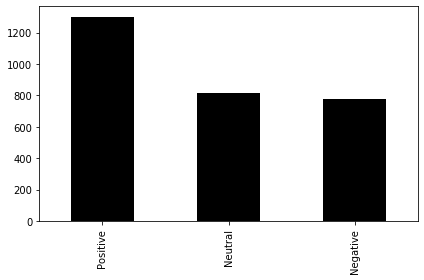

In [101]:
print('High valence (positive), low valence (negative) and neutral distribution of scores.')
data['Valence high/low'].value_counts().plot(kind="bar", color='k')
plt.tight_layout()

print(' ')
print(data['Valence high/low'].value_counts())
print(' ')


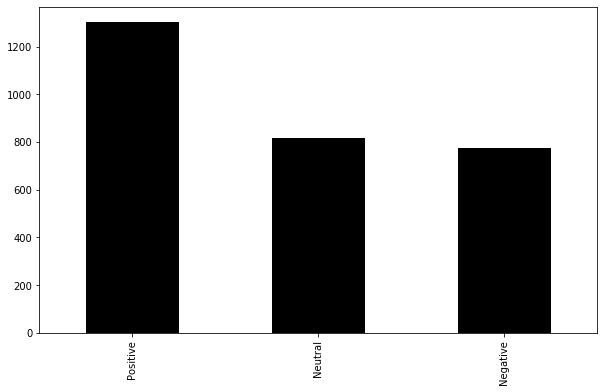

In [103]:
# save

COLUMN = 'Valence high/low'
SAVE_AS = 'latex/latex_fb/valence_high_low.pdf'

series = data[COLUMN].value_counts().plot(kind="bar", color='k',figsize=(10, 6))
fig = series.get_figure()
fig.savefig(SAVE_AS)

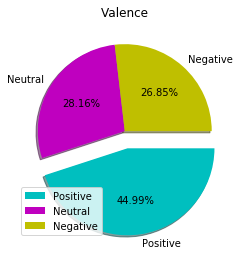

In [106]:
values = data['Valence high/low'].value_counts()
colors = ['c', 'm', 'y']
labels = ['Positive', 'Neutral', 'Negative']
explode = (0.2, 0, 0)

plot = plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.2f%%',
counterclock=False, shadow=True)

plt.title('Valence')
plt.legend(labels,loc=3)
plt.savefig('latex/latex_fb/valence_pie.pdf')

High arousal (high), low arousal (low) and neutral distribution of scores.
 
Low        2016
High        565
Neutral     313
Name: Arousal high/low, dtype: int64
 


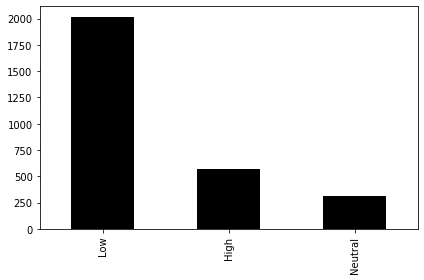

In [104]:
print('High arousal (high), low arousal (low) and neutral distribution of scores.')
data['Arousal high/low'].value_counts().plot(kind="bar", color='k')
plt.tight_layout()

print(' ')
print(data['Arousal high/low'].value_counts())
print(' ')

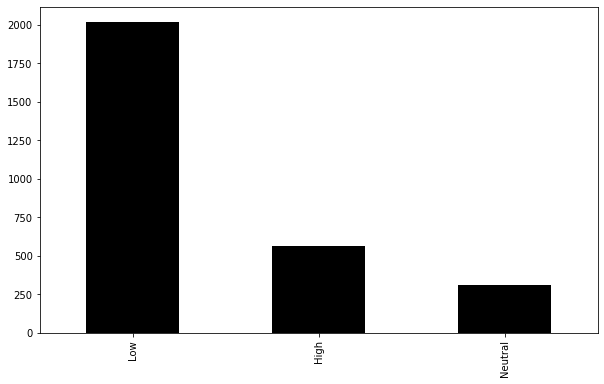

In [105]:
# save

COLUMN = 'Arousal high/low'
SAVE_AS = 'latex/latex_fb/arousal_high_low.pdf'

series = data[COLUMN].value_counts().plot(kind="bar", color='k',figsize=(10, 6))
fig = series.get_figure()
fig.savefig(SAVE_AS)

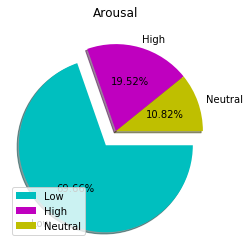

In [107]:
values = data['Arousal high/low'].value_counts()
colors = ['c', 'm', 'y']
labels = ['Low', 'High', 'Neutral']
explode = (0.2, 0, 0)

plot = plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.2f%%',
counterclock=False, shadow=True)

plt.title('Arousal')
plt.legend(labels,loc=3)
plt.savefig('latex/latex_fb/arousal_pie.pdf')

### Valence 1, Valence 2 (annotators)

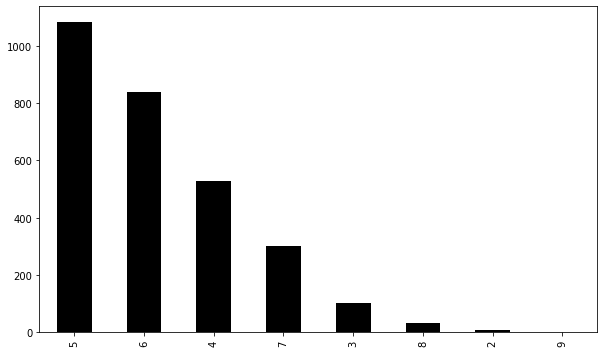

In [108]:
# save

COLUMN = 'Valence1'
SAVE_AS = 'latex/latex_fb/fine_grained_valence_distribution_annotater1.pdf'

series = data[COLUMN].value_counts().plot(kind="bar", color='k',figsize=(10, 6))
fig = series.get_figure()
fig.savefig(SAVE_AS)

In [112]:
data['Valence1'].value_counts()

5    1084
6     839
4     527
7     300
3     102
8      34
2       7
9       1
Name: Valence1, dtype: int64

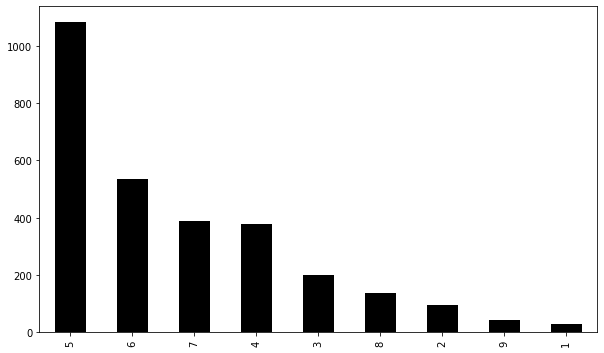

In [113]:
# save

COLUMN = 'Valence2'
SAVE_AS = 'latex/latex_fb/fine_grained_valence_distribution_annotater2.pdf'

series = data[COLUMN].value_counts().plot(kind="bar", color='k',figsize=(10, 6))
fig = series.get_figure()
fig.savefig(SAVE_AS)

In [114]:
data['Valence2'].value_counts()

5    1083
6     534
7     390
4     378
3     201
8     138
2      96
9      45
1      29
Name: Valence2, dtype: int64

### Arousal 1, Arousal 2 (annotators)

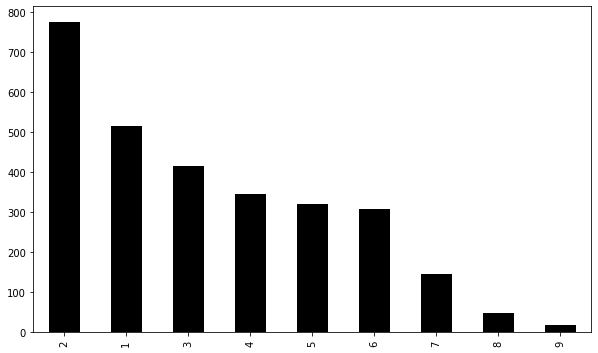

In [116]:
# save

COLUMN = 'Arousal1'
SAVE_AS = 'latex/latex_fb/fine-grained_arousal_distribution_annotater1.pdf'

series = data[COLUMN].value_counts().plot(kind="bar", color='k',figsize=(10, 6))
fig = series.get_figure()
fig.savefig(SAVE_AS)

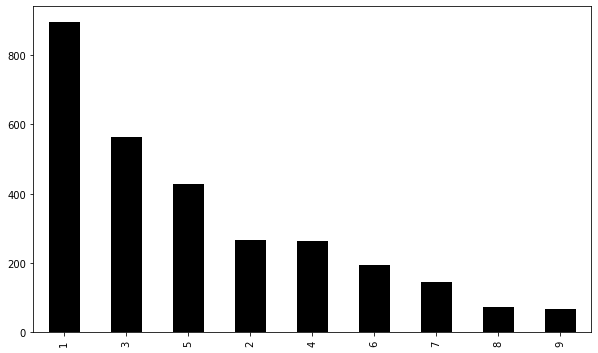

In [117]:
# save

COLUMN = 'Arousal2'
SAVE_AS = 'latex/latex_fb/fine-grained_arousal_distribution_annotater2.pdf'

series = data[COLUMN].value_counts().plot(kind="bar", color='k',figsize=(10, 6))
fig = series.get_figure()
fig.savefig(SAVE_AS)

### Mean Valence

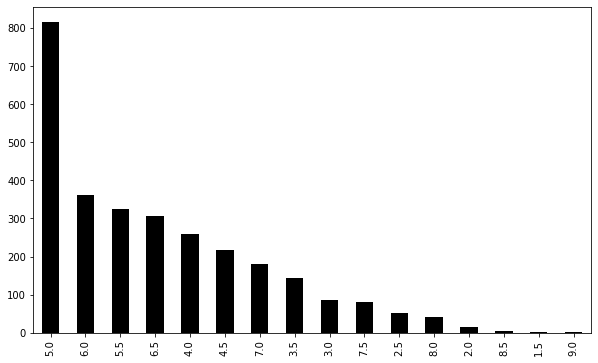

In [118]:
# save

COLUMN = 'Valence'
SAVE_AS = 'latex/latex_fb/mean_valence.pdf'

series = data[COLUMN].value_counts().plot(kind="bar", color='k',figsize=(10, 6))
fig = series.get_figure()
fig.savefig(SAVE_AS)

### Mean Arousal

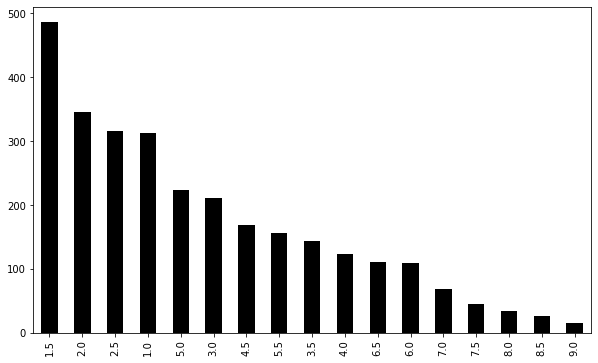

In [119]:
# save

COLUMN = 'Arousal'
SAVE_AS = 'latex/latex_fb/mean_arousal.pdf'

series = data[COLUMN].value_counts().plot(kind="bar", color='k',figsize=(10, 6))
fig = series.get_figure()
fig.savefig(SAVE_AS)

### Dataframe

In [132]:
df_counts1 = data[['Valence1', 'Valence2', 'Arousal1', 'Arousal2']]
df_counts2 = data[['Valence', 'Arousal']]

count_valence_arousal_annotator_1_2 = df_counts1.apply(pd.Series.value_counts).fillna('-')
count_mean_valence_arousal = df_counts2.apply(pd.Series.value_counts).fillna('-')

In [133]:
count_valence_arousal_annotator_1_2

,Valence1,Valence2,Arousal1,Arousal2
1,-,29,514,895
2,7,96,775,266
3,102,201,416,563
4,527,378,346,264
5,1084,1083,320,427
6,839,534,309,193
7,300,390,146,145
8,34,138,49,74
9,1,45,19,67


In [128]:
count_mean_valence_arousal

,Valence,Arousal
1.0,-,313
1.5,2,486
2.0,16,345
2.5,51,316
3.0,86,211
3.5,144,143
4.0,260,123
4.5,218,169
5.0,815,223
5.5,324,156


### Bar charts

In [152]:
df1_arousal = data['Arousal'].value_counts()
df2_valence = data['Valence'].value_counts()
df_comb = df1_arousal.to_frame().join(df2_valence.to_frame())
df_comb.style.bar(color='#84DDD6')

,Arousal,Valence
1.5,486,2
2.0,345,16
2.5,316,51
1.0,313,nan
5.0,223,815
3.0,211,86
4.5,169,218
5.5,156,324
3.5,143,144
4.0,123,260


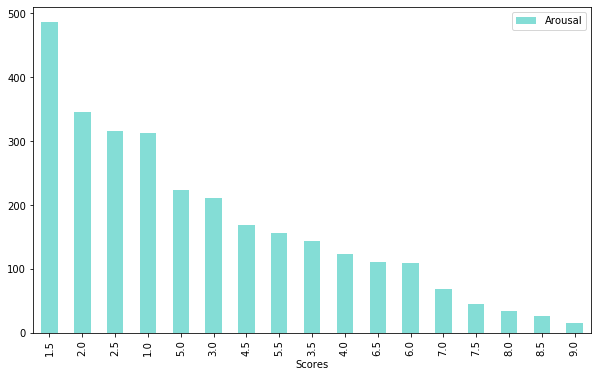

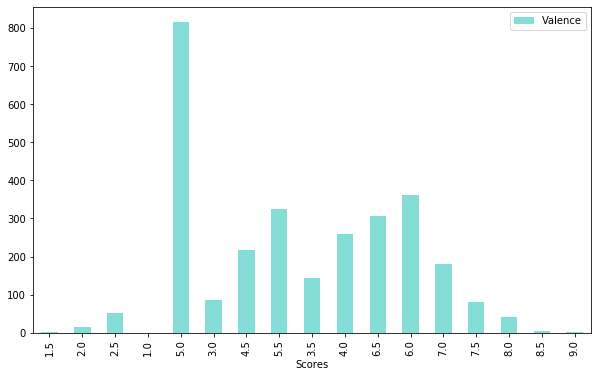

In [153]:
df_comb['Scores'] = df_comb.index

chart_arousal = df_comb.plot(kind='bar',x='Scores',y='Arousal',color='#84DDD6',figsize=(10, 6))
chart_valence = df_comb.plot(kind='bar',x='Scores',y='Valence',color='#84DDD6',figsize=(10, 6))

In [154]:
# save

SAVE_AS = 'latex/latex_fb/sorted_mean_arousal_scores.pdf'

fig = chart_arousal.get_figure()
fig.savefig(SAVE_AS)

In [155]:
# save

SAVE_AS = 'latex/latex_fb/sorted_mean_valence_scores.pdf'

fig = chart_valence.get_figure()
fig.savefig(SAVE_AS)

### Sample low arousal

In [156]:
low_arousal = []
for i in range(0,len(data)):
    if data['Arousal'].iloc[i] == 1.5:
        low_arousal.append(data.iloc[i])

In [157]:
len(low_arousal)

486

In [163]:
df_low_arousal = pd.DataFrame(low_arousal, columns = ['Anonymized Message', 'Arousal1','Arousal2','Arousal','Valence1','Valence2', 'Valence'])
df_low_arousal.head()

,Anonymized Message,Arousal1,Arousal2,Arousal,Valence1,Valence2,Valence
23,3 more days,2,1,1.5,5,5,5.0
24,got a new # if you want it let me know.,2,1,1.5,5,5,5.0
43,is contemplating how to spend his Xbox points...,2,1,1.5,5,5,5.0
58,is fixin' to have a party this halloween.,2,1,1.5,6,5,5.5
63,Someone should make a <PERSON> Facts website to compete against Chuck Norris.,2,1,1.5,5,5,5.0


In [160]:
frame = [data['Anonymized Message'],data['Valence1'],data['Valence2'],data['Arousal1'],data['Arousal2'],data['Valence'], data['Arousal'], data['Valence high/low'], data['Arousal high/low']]
random_sample_analysis = pd.concat(frame, axis=1)

In [162]:
random_sample_analysis.head()

,Anonymized Message,Valence1,Valence2,Arousal1,Arousal2,Valence,Arousal,Valence high/low,Arousal high/low
0,We'll be off and running to a lil' place called SILVERWOOD today! Can't wait! :),9,9,8,8,9.0,8.0,Positive,High
1,I really wana move soon!,4,5,5,7,4.5,6.0,Negative,High
2,thinking at charity cup,5,5,1,1,5.0,1.0,Neutral,Neutral
3,"thinks that for girls, boys are easily found. But GIRLS don't realize they need MEN!!",4,3,6,7,3.5,6.5,Negative,High
4,Our Wedding Anniversary tonight...,7,7,4,5,7.0,4.5,Positive,Low


In [164]:
rsa = random_sample_analysis[1500:1515]

In [165]:
rsa

,Anonymized Message,Valence1,Valence2,Arousal1,Arousal2,Valence,Arousal,Valence high/low,Arousal high/low
1501,"Shout Out To Melpo !! Love The 4X0T308Look , You FULLY Rock =P Cyaaz In English !!",7,8,7,6,7.5,6.5,Positive,High
1502,crna :),6,6,1,3,6.0,2.0,Positive,Low
1503,It's a sad day in Patriots land today. I Guess that's what I get for talking so much smack.,4,4,2,1,4.0,1.5,Negative,Low
1504,is it too early to be relaxing sipping on a long neck CORONA? *hick* : ),6,6,2,4,6.0,3.0,Positive,Low
1505,i tried to do farm pals but i need to download adobe flash player and that wont work on my computor =(,4,4,2,3,4.0,2.5,Negative,Low
1506,2010 blink and you will miss it its flying along time machine anyone.....,5,5,1,3,5.0,2.0,Neutral,Low
1507,2 days til I'm back in the US baby!,7,6,5,5,6.5,5.0,Positive,Low
1508,"The worst way to miss someone is \t\twhen they are right beside you and yet you know you can never have them.\\""""",3,2,2,1,2.5,1.5,Negative,Low
1509,Getting bored of facebook.............. x_______x,4,4,1,4,4.0,2.5,Negative,Low
1510,thank you to whoever it was that sent the roses from Malaysia...there was no name so im just saying a general thank you to everyone....pics will be up soon....xox,6,6,2,3,6.0,2.5,Positive,Low


## Inter-annotator agreement (cohen-kappa-score)

In [166]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

### Example

In [167]:
a1 = [1,2,3,4,5,6,7,8,9]
a2 = [2,2,4,4,4,6,9,1,9]

cohen_kappa_score(a1, a2, labels=None, weights=None, sample_weight=None)

0.375

In [168]:
tup = list(zip(a1,a2))

In [169]:
scores = pd.DataFrame(tup, columns=['Scores 1','Scores 2'])

In [170]:
scores

,Scores 1,Scores 2
0,1,2
1,2,2
2,3,4
3,4,4
4,5,4
5,6,6
6,7,9
7,8,1
8,9,9


In [171]:
import scipy
from tabulate import tabulate

In [172]:
cm_example = confusion_matrix(a1, a2)
print(tabulate(cm_example, tablefmt="latex", floatfmt=".2f"))


\begin{tabular}{rrrrrrrrr}
\hline
 0.00 & 1.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
 0.00 & 1.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
 0.00 & 0.00 & 0.00 & 1.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
 0.00 & 0.00 & 0.00 & 1.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
 0.00 & 0.00 & 0.00 & 1.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 & 0.00 & 0.00 & 0.00 \\
 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
 1.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
\hline
\end{tabular}


### Valence

In [173]:
data_v1 = np.asarray(data['Valence1'])
data_v2 = np.asarray(data['Valence2'])

cohen_kappa_score(data_v1, data_v2, labels=None, weights=None, sample_weight=None)

0.36758423370889437

In [174]:
# Confusion matrix Valence
cm_val = confusion_matrix(data_v1, data_v2)
cm_val

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   3,   2,   0,   0,   0,   0,   0,   0],
       [ 13,  36,  37,  11,   4,   0,   1,   0,   0],
       [ 13,  48, 128, 227,  92,  15,   4,   0,   0],
       [  1,   5,  27, 119, 776, 131,  21,   4,   0],
       [  0,   2,   6,  21, 189, 318, 235,  59,   9],
       [  0,   1,   1,   0,  22,  67, 118,  62,  29],
       [  0,   1,   0,   0,   0,   3,  11,  13,   6],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1]])

In [176]:
print(tabulate(cm_val, tablefmt="latex", floatfmt=".2f"))

\begin{tabular}{rrrrrrrrr}
\hline
  0.00 &  0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &  0.00 &  0.00 \\
  2.00 &  3.00 &   2.00 &   0.00 &   0.00 &   0.00 &   0.00 &  0.00 &  0.00 \\
 13.00 & 36.00 &  37.00 &  11.00 &   4.00 &   0.00 &   1.00 &  0.00 &  0.00 \\
 13.00 & 48.00 & 128.00 & 227.00 &  92.00 &  15.00 &   4.00 &  0.00 &  0.00 \\
  1.00 &  5.00 &  27.00 & 119.00 & 776.00 & 131.00 &  21.00 &  4.00 &  0.00 \\
  0.00 &  2.00 &   6.00 &  21.00 & 189.00 & 318.00 & 235.00 & 59.00 &  9.00 \\
  0.00 &  1.00 &   1.00 &   0.00 &  22.00 &  67.00 & 118.00 & 62.00 & 29.00 \\
  0.00 &  1.00 &   0.00 &   0.00 &   0.00 &   3.00 &  11.00 & 13.00 &  6.00 \\
  0.00 &  0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &  0.00 &  1.00 \\
\hline
\end{tabular}


### Arousal

In [175]:
data_a1 = np.asarray(data['Arousal1'])
data_a2 = np.asarray(data['Arousal2'])

cohen_kappa_score(data_a1, data_a2, labels=None, weights=None, sample_weight=None)

0.2119570605759572

In [177]:
# Confusion matrix Valence
cm_arousal = confusion_matrix(data_a1, data_a2)
cm_arousal

array([[313,  63, 124,  10,   3,   1,   0,   0,   0],
       [423, 103, 201,  37,   8,   3,   0,   0,   0],
       [118,  68, 141,  56,  25,   5,   3,   0,   0],
       [ 37,  26,  73,  75, 100,  23,   9,   3,   0],
       [  4,   5,  19,  59, 171,  40,  18,   4,   0],
       [  0,   1,   5,  26, 106,  74,  65,  24,   8],
       [  0,   0,   0,   1,  14,  42,  40,  28,  21],
       [  0,   0,   0,   0,   0,   5,   9,  12,  23],
       [  0,   0,   0,   0,   0,   0,   1,   3,  15]])

In [178]:
print(tabulate(cm_arousal, tablefmt="latex", floatfmt=".2f"))

\begin{tabular}{rrrrrrrrr}
\hline
 313.00 &  63.00 & 124.00 & 10.00 &   3.00 &  1.00 &  0.00 &  0.00 &  0.00 \\
 423.00 & 103.00 & 201.00 & 37.00 &   8.00 &  3.00 &  0.00 &  0.00 &  0.00 \\
 118.00 &  68.00 & 141.00 & 56.00 &  25.00 &  5.00 &  3.00 &  0.00 &  0.00 \\
  37.00 &  26.00 &  73.00 & 75.00 & 100.00 & 23.00 &  9.00 &  3.00 &  0.00 \\
   4.00 &   5.00 &  19.00 & 59.00 & 171.00 & 40.00 & 18.00 &  4.00 &  0.00 \\
   0.00 &   1.00 &   5.00 & 26.00 & 106.00 & 74.00 & 65.00 & 24.00 &  8.00 \\
   0.00 &   0.00 &   0.00 &  1.00 &  14.00 & 42.00 & 40.00 & 28.00 & 21.00 \\
   0.00 &   0.00 &   0.00 &  0.00 &   0.00 &  5.00 &  9.00 & 12.00 & 23.00 \\
   0.00 &   0.00 &   0.00 &  0.00 &   0.00 &  0.00 &  1.00 &  3.00 & 15.00 \\
\hline
\end{tabular}


### Stats

In [179]:
df = data[['Valence', 'Arousal','word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length', 'char_count', 'punct_count', 'hashtag_count', 'mention_count']]

In [180]:
df.head()

,Valence,Arousal,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punct_count,hashtag_count,mention_count
0,9.0,8.0,15,15,7,0,4.0,80,7,0,0
1,4.5,6.0,5,5,1,0,4.0,24,1,0,0
2,5.0,1.0,4,4,1,0,5.0,23,0,0,0
3,3.5,6.5,15,15,6,0,5.0,85,5,0,0
4,7.0,4.5,4,4,1,0,8.0,34,3,0,0


In [182]:
mean_df = pd.DataFrame(df.mean())
mean_df = mean_df.rename(columns={0: "Mean"})
mean_df

,Mean
Valence,5.262094
Arousal,3.353490
word_count,16.194886
unique_word_count,14.589150
stop_word_count,7.053905
url_count,0.008293
mean_word_length,4.818590
char_count,86.907740
punct_count,5.304423
hashtag_count,0.004492


In [183]:
np.round(df.describe(),decimals=2)

,Valence,Arousal,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punct_count,hashtag_count,mention_count
count,2894.00,2894.00,2894.00,2894.00,2894.00,2894.00,2894.00,2894.00,2894.00,2894.00,2894.00
mean,5.26,3.35,16.19,14.59,7.05,0.01,4.82,86.91,5.30,0.00,0.09
std,1.19,1.98,14.89,12.05,7.66,0.09,3.39,79.07,6.36,0.07,0.38
min,1.50,1.00,1.00,1.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00
25%,4.50,1.50,6.00,6.00,2.00,0.00,4.00,35.00,2.00,0.00,0.00
50%,5.00,2.50,11.00,11.00,5.00,0.00,4.00,62.00,4.00,0.00,0.00
75%,6.00,5.00,20.00,19.00,9.00,0.00,5.00,108.75,7.00,0.00,0.00
max,9.00,9.00,148.00,70.00,50.00,1.00,102.00,697.00,86.00,1.00,6.00


## Lexical analysis 

- N-gram frequency – number of unigrams, bigrams, trigrams
- Verbs
- Adjectives
- NER (random sample)
- Depenency grammar (random sample)
- Emotion words – occurrence of emotion words in the dataset based on a selected emotion lexicon
- LDA

### N-gram frequency – number of unigrams, bigrams, trigrams


In [184]:
from sklearn.feature_extraction.text import CountVectorizer

lexical = data[TEXT].values

In [195]:
def ngram_frequency(documents, MAX, NGRAMS, STOP, NUM_WORDS):
    
    cv = CountVectorizer(max_features = MAX, stop_words=STOP, ngram_range=NGRAMS)
    X = cv.fit_transform(documents).toarray()
    
    occ = np.asarray(X.sum(axis=0)).ravel().tolist()
    counts_df = pd.DataFrame({'n-gram': cv.get_feature_names(), 'occurrences': occ}).reset_index(drop=True)
    df = counts_df.sort_values(by='occurrences', ascending=False).head(NUM_WORDS)
    
    return df.reset_index(drop=True)#.style.bar(color='#84DDD6')

In [196]:
ngram_frequency(lexical, MAX = 5000, NGRAMS = (1,1), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,person,301
1,just,234
2,day,229
3,love,177
4,like,169
5,time,155
6,got,154
7,today,150
8,birthday,149
9,happy,124


In [197]:
ngram_frequency(lexical, MAX = 5000, NGRAMS = (2,2), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,birthday wishes,52
1,person person,49
2,h8 ha,48
3,ha h8,47
4,thanks birthday,35
5,just got,34
6,happy birthday,30
7,great day,21
8,copy paste,20
9,getting ready,15


In [198]:
ngram_frequency(lexical, MAX = 5000, NGRAMS = (3,3), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,h8 ha h8,47
1,ha h8 ha,47
2,thanks birthday wishes,26
3,person person person,16
4,thank birthday wishes,10
5,wished happy birthday,9
6,thanks day wishes,8
7,copy paste status,6
8,birthday wishes great,5
9,won copy paste,5


In [200]:
ngram_frequency(lexical, MAX = 5000, NGRAMS = (3,3), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,h8 ha h8,47
1,ha h8 ha,47
2,thanks birthday wishes,26
3,person person person,16
4,thank birthday wishes,10
5,wished happy birthday,9
6,thanks day wishes,8
7,copy paste status,6
8,birthday wishes great,5
9,won copy paste,5


In [202]:
lexical_new = np.delete(lexical, [1900]) # outlier removal

In [205]:
ngram_frequency(lexical_new, MAX = 5000, NGRAMS = (2,2), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,birthday wishes,52
1,person person,49
2,thanks birthday,35
3,just got,34
4,happy birthday,30
5,great day,21
6,copy paste,20
7,new year,15
8,getting ready,15
9,merry christmas,14


In [206]:
ngram_frequency(lexical_new, MAX = 5000, NGRAMS = (3,3), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,thanks birthday wishes,26
1,person person person,16
2,thank birthday wishes,10
3,wished happy birthday,9
4,thanks day wishes,8
5,copy paste status,6
6,birthday wishes great,5
7,won copy paste,5
8,happy new year,5
9,thanks wished happy,4


In [207]:
ngram_frequency(lexical_new, MAX = 5000, NGRAMS = (2,2), STOP = None, NUM_WORDS = 20)

,n-gram,occurrences
0,in the,108
1,for the,106
2,if you,82
3,of the,79
4,to the,77
5,to be,75
6,going to,72
7,all the,71
8,to go,64
9,on the,62


In [208]:
ngram_frequency(lexical_new, MAX = 5000, NGRAMS = (3,3), STOP = None, NUM_WORDS = 20)

,n-gram,occurrences
0,the birthday wishes,35
1,for all the,33
2,person and person,24
3,for the birthday,21
4,is going to,19
5,to go to,19
6,thanks for all,18
7,all the birthday,18
8,copy and paste,18
9,everyone for the,17


In [209]:
ngram_df = data.drop(data.index[1900])

### VALENCE: N-grams for high valence, low valence

In [211]:
pos = []
neg = []
neutral = []

for i in range(0, len(ngram_df)):
    if ngram_df['Valence high/low'].iloc[i] == 'Positive':
        pos.append(ngram_df[TEXT].iloc[i])
    elif ngram_df['Valence high/low'].iloc[i] == 'Negative':
        neg.append(ngram_df[TEXT].iloc[i])
    elif ngram_df['Valence high/low'].iloc[i] == 'Neutral':
        neutral.append(ngram_df[TEXT].iloc[i])
        

In [215]:
print(f'Positive: {len(pos)}')
print(f'Negative: {len(neg)}')
print(f'Neutral: {len(neutral)}')

Positive: 1301
Negative: 777
Neutral: 815


In [217]:
ngram_frequency(pos, MAX = 5000, NGRAMS = (1,1), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,person,168
1,day,161
2,love,134
3,birthday,129
4,just,109
5,thanks,108
6,happy,105
7,today,90
8,good,87
9,got,87


In [218]:
ngram_frequency(pos, MAX = 5000, NGRAMS = (2,2), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,birthday wishes,50
1,person person,34
2,thanks birthday,32
3,happy birthday,28
4,great day,21
5,just got,19
6,merry christmas,14
7,new year,13
8,getting ready,12
9,thank birthday,11


In [219]:
ngram_frequency(pos, MAX = 5000, NGRAMS = (3,3), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,thanks birthday wishes,24
1,person person person,13
2,thank birthday wishes,10
3,wished happy birthday,9
4,thanks day wishes,8
5,happy new year,5
6,birthday wishes great,5
7,wishes great day,4
8,thanks wished happy,4
9,birthday wishes love,3


In [220]:
ngram_frequency(neg, MAX = 5000, NGRAMS = (1,1), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,just,77
1,person,74
2,like,50
3,need,44
4,got,41
5,know,40
6,im,39
7,people,39
8,time,36
9,life,34


In [221]:
ngram_frequency(neg, MAX = 5000, NGRAMS = (2,2), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,person person,10
1,just got,8
2,dont know,7
3,help help,7
4,feel like,6
5,don know,6
6,feels like,6
7,sick tired,4
8,screen click,4
9,phone numbers,4


In [222]:
ngram_frequency(neg, MAX = 5000, NGRAMS = (3,3), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,help help help,4
1,person person person,3
2,having case mondays,2
3,click account edit,2
4,rain rain away,2
5,numbers facebook joke,2
6,friends know happening,2
7,let friends know,2
8,right screen click,2
9,know happening remove,2


### AROUSAL: N-grams for high arousal, low arousal

In [223]:
# Outlier removed

high = []
low = []
neutral_arousal = []

for i in range(0, len(ngram_df)):
    if ngram_df['Arousal high/low'].iloc[i] == 'High':
        high.append(ngram_df[TEXT].iloc[i])
    elif ngram_df['Arousal high/low'].iloc[i] == 'Low':
        low.append(ngram_df[TEXT].iloc[i])
    elif ngram_df['Arousal high/low'].iloc[i] == 'Neutral':
        neutral_arousal.append(ngram_df[TEXT].iloc[i])

In [227]:
ngram_frequency(high, MAX = 5000, NGRAMS = (1,1), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,person,58
1,day,50
2,birthday,46
3,just,44
4,love,41
5,thanks,38
6,got,37
7,happy,37
8,wishes,31
9,today,27


In [228]:
ngram_frequency(high, MAX = 5000, NGRAMS = (2,2), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,birthday wishes,18
1,person person,9
2,thanks birthday,9
3,great day,8
4,happy birthday,8
5,help help,7
6,getting ready,5
7,new year,5
8,merry christmas,5
9,happy happy,4


In [229]:
ngram_frequency(high, MAX = 5000, NGRAMS = (3,3), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,thanks birthday wishes,8
1,help help help,4
2,yum yum yum,3
3,birthday wishes love,3
4,thank birthday wishes,3
5,ooo ooo ooo,2
6,happy new year,2
7,yankee oscar uniform,2
8,happy happy happy,2
9,wishes love guys,2


In [230]:
ngram_frequency(low, MAX = 5000, NGRAMS = (1,1), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,person,221
1,just,175
2,day,166
3,like,132
4,love,123
5,time,123
6,today,109
7,got,106
8,birthday,103
9,life,93


In [231]:
ngram_frequency(low, MAX = 5000, NGRAMS = (2,2), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,person person,37
1,birthday wishes,34
2,thanks birthday,26
3,just got,26
4,happy birthday,22
5,copy paste,16
6,great day,13
7,feel like,11
8,don know,11
9,looks like,10


In [232]:
ngram_frequency(low, MAX = 5000, NGRAMS = (3,3), STOP = 'english', NUM_WORDS = 20)

,n-gram,occurrences
0,thanks birthday wishes,18
1,person person person,14
2,wished happy birthday,8
3,thank birthday wishes,7
4,copy paste status,6
5,thanks day wishes,5
6,won copy paste,5
7,birthday wishes great,5
8,thanks birthday messages,4
9,smack upside head,4


In [233]:
df1 = (ngram_frequency(high, MAX = 5000, NGRAMS = (1,1), STOP = 'english', NUM_WORDS = 20))
df2 = (ngram_frequency(high, MAX = 5000, NGRAMS = (2,2), STOP = 'english', NUM_WORDS = 20))
df3 = (ngram_frequency(high, MAX = 5000, NGRAMS = (3,3), STOP = 'english', NUM_WORDS = 20))

df4 = (ngram_frequency(low, MAX = 5000, NGRAMS = (1,1), STOP = 'english', NUM_WORDS = 20))
df5 = (ngram_frequency(low, MAX = 5000, NGRAMS = (2,2), STOP = 'english', NUM_WORDS = 20))
df6 = (ngram_frequency(low, MAX = 5000, NGRAMS = (3,3), STOP = 'english', NUM_WORDS = 20))

frames_high = [df1, df2, df3]
frames_low = [df4, df5, df6]

result_high = pd.concat(frames_high, ignore_index=True)
result_low = pd.concat(frames_low, ignore_index=True)

In [235]:
arousal_list_high = result_high['n-gram'].values
arousal_list_low = result_low['n-gram'].values

In [236]:
print(len(arousal_list_high))
print(len(arousal_list_low))

60
60


In [237]:
overlap = []

for i in arousal_list_high:
    if i in arousal_list_low:
        print(i)

person
day
birthday
just
love
thanks
got
happy
today
time
good
going
great
like
birthday wishes
person person
thanks birthday
great day
happy birthday
getting ready
new year
merry christmas
just got
friends family
thanks birthday wishes
thank birthday wishes
happy new year
thanks day wishes


### UPPERCASE and punctuation count

In [238]:
def all_caps(document):
    
    ''' Takes a list of strings, finds all uppercase tokens,
    prints the total number of uppercase tokens and returns a
    list of all uppercase tokens.''' 
    
    all_caps_list = []
    
    for i in range(0,len(document)):
        text = document[i].split()
        for token in text:
            if token != 'I' and token.isupper():
                all_caps_list.append(token)
    
    print(f'There are {len(all_caps_list)} tokens in all caps in this document.')
    return all_caps_list

In [241]:
all_caps_high = all_caps(high)

There are 1128 tokens in all caps in this document.


In [242]:
all_caps_low = all_caps(low)

There are 970 tokens in all caps in this document.


### Punctuation

In [243]:
def punct_count(document):
    
    ''' Takes a list of strings, finds all punctuations,
    prints the total number of punct tokens and returns a
    list of all punct tokens.''' 

    punct_count_list = []
    
    for i in document:
        for c in i:
            if c in string.punctuation:
                punct_count_list.append(c)

    print(f'There are {len(punct_count_list)} punctuations in this document.')
    return punct_count_list

In [244]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [245]:
punct_high = punct_count(high)

There are 4196 punctuations in this document.


In [246]:
punct_low = punct_count(low)

There are 10389 punctuations in this document.


### Verbs and adjectives

In [251]:
lexical[1500:1515]

array(['Shout Out To Melpo !! Love The 4X0T308Look , You FULLY Rock =P Cyaaz In English !!',
       'crna :)',
       "It's a sad day in Patriots land today. I Guess that's what I get for talking so much smack.",
       'is it too early to be relaxing sipping on a long neck CORONA? *hick* : )',
       'i tried to do farm pals but i need to download adobe flash player and that wont work on my computor =(',
       '2010 blink and you will miss it its flying along time machine anyone.....',
       "2 days til I'm back in the US baby!",
       'The worst way to miss someone is \t\twhen they are right beside you and yet you know you can never have them.\\\\""',
       'Getting bored of facebook.............. x_______x',
       'thank you to whoever it was that sent the roses from Malaysia...there was no name so im just saying a general thank you to everyone....pics will be up soon....xox',
       'fixin 2 go crazy blaaaaaaaaaa i just did bamaboyz 4 life',
       'not feeling well... @_@', '

In [249]:
lexical_full = ' '.join(map(str, lexical)) 
lexical_sample = ' '.join(map(str, lexical[1500:1515])) 

In [250]:
lexical_sample

'Shout Out To Melpo !! Love The 4X0T308Look , You FULLY Rock =P Cyaaz In English !! crna :) It\'s a sad day in Patriots land today. I Guess that\'s what I get for talking so much smack. is it too early to be relaxing sipping on a long neck CORONA? *hick* : ) i tried to do farm pals but i need to download adobe flash player and that wont work on my computor =( 2010 blink and you will miss it its flying along time machine anyone..... 2 days til I\'m back in the US baby! The worst way to miss someone is \t\twhen they are right beside you and yet you know you can never have them.\\\\"" Getting bored of facebook.............. x_______x thank you to whoever it was that sent the roses from Malaysia...there was no name so im just saying a general thank you to everyone....pics will be up soon....xox fixin 2 go crazy blaaaaaaaaaa i just did bamaboyz 4 life not feeling well... @_@ R.I.P.<PERSON> i\'m not dirty as yo think I am! Blank'

In [252]:
import en_core_web_sm

In [253]:
nlp = en_core_web_sm.load()
doc = nlp(lexical_full)

In [254]:
verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
adjectives = [token.lemma_ for token in doc if token.pos_ == "ADJ"]


In [256]:
print(f'Number of adjectives:          {(len(adjectives))}')
print(f'Number of unique adjectives:   {len(set(adjectives))}')
print(' ')
print(f'Number of verbs:               {len(verbs)}')
print(f'Number of unique verbs:        {len(set(verbs))}')

Number of adjectives:          3085
Number of unique adjectives:   776
 
Number of verbs:               7283
Number of unique verbs:        1101


In [259]:
adjectives[100:120]

['mid',
 'black',
 'many',
 'happy',
 'late',
 'magical',
 'first',
 'weary',
 'faint',
 'alien',
 'free',
 'med',
 'loose',
 'unmarked',
 'remote',
 'great',
 'alive',
 'many',
 'first',
 'first']

In [264]:
verbs[100:120]

['get',
 'finish',
 'hurt',
 'come',
 'perform',
 'look',
 'focus',
 'focus',
 'focus',
 'think',
 'would',
 'happen',
 'ask',
 'have',
 'smile',
 'go',
 'happen',
 'fall',
 'drive',
 'cape']

In [265]:
from collections import Counter, OrderedDict

count_verbs = Counter(verbs)
count_adjectives = Counter(adjectives)

In [266]:
count_verbs.most_common(20)

[('go', 336),
 ('get', 270),
 ('will', 227),
 ('can', 213),
 ('be', 156),
 ('make', 137),
 ('know', 135),
 ('think', 123),
 ('want', 118),
 ('love', 117),
 ('see', 117),
 ('wish', 117),
 ('would', 107),
 ('need', 101),
 ('say', 98),
 ('come', 96),
 ('take', 93),
 ('feel', 86),
 ('thank', 81),
 ('look', 76)]

In [267]:
most_common_verbs_dict = OrderedDict(count_verbs.most_common()) # creates a dictionary of all verbs as keys and their counts as values

In [268]:
count_adjectives.most_common(20)

[('good', 157),
 ('great', 100),
 ('happy', 91),
 ('new', 81),
 ('more', 65),
 ('bad', 52),
 ('last', 49),
 ('little', 44),
 ('many', 43),
 ('ready', 42),
 ('well', 42),
 ('old', 40),
 ('tired', 39),
 ('sick', 37),
 ('next', 36),
 ('much', 33),
 ('long', 33),
 ('nice', 32),
 ('other', 32),
 ('beautiful', 30)]

In [269]:
most_common_adjectives_dict = OrderedDict(count_adjectives.most_common())

### Most common verbs side by side

In [271]:
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [270]:
most_common_verbs_df = pd.DataFrame.from_dict(most_common_verbs_dict, orient='index', columns=['Count'])

In [273]:
df1_verbs = most_common_verbs_df[0:10]
df2_verbs = most_common_verbs_df[10:20]
df3_verbs = most_common_verbs_df[20:30]

display_side_by_side(df1_verbs, df2_verbs, df3_verbs)

,Count
go,336
get,270
will,227
can,213
be,156
make,137
know,135
think,123
want,118
love,117


### Most common adjectives side by side

In [282]:
most_common_adjectives_df = pd.DataFrame.from_dict(most_common_adjectives_dict, orient='index', columns=['Count'])

In [283]:
df1_adjectives = most_common_adjectives_df[0:10]
df2_adjectives = most_common_adjectives_df[10:20]
df3_adjectives = most_common_adjectives_df[20:30]

display_side_by_side(df1_adjectives,df2_adjectives,df3_adjectives)

,Count
good,157
great,100
happy,91
new,81
more,65
bad,52
last,49
little,44
many,43
ready,42


### POS tags

In [288]:
nlp = en_core_web_sm.load()
doc = nlp(lexical_sample)

In [289]:
pos_df = pd.DataFrame()

for token in doc:
    pos_tags = pd.DataFrame({'TEXT': token.text, 'LEMMA': token.lemma_, 'POS': token.pos_, 'TAG': token.tag_, 'DEP': token.dep_,
            'SHAPE': token.shape_, 'ALPHA': token.is_alpha, 'STOP': token.is_stop}, index=[0])

    pos_df = pd.concat([pos_df, pos_tags])
    
pos_df.head(20)

,TEXT,LEMMA,POS,TAG,DEP,SHAPE,ALPHA,STOP
0,Shout,shout,VERB,VB,ROOT,Xxxxx,True,False
0,Out,out,ADP,RP,prt,Xxx,True,True
0,To,to,ADP,IN,prep,Xx,True,True
0,Melpo,Melpo,PROPN,NNP,pobj,Xxxxx,True,False
0,!,!,PUNCT,.,punct,!,False,False
0,!,!,PUNCT,.,punct,!,False,False
0,Love,love,VERB,VB,ROOT,Xxxx,True,False
0,The,the,DET,DT,det,Xxx,True,True
0,4X0T308Look,4x0t308look,NOUN,NN,dobj,dXdXdddXxxx,False,False
0,",",",",PUNCT,",",punct,",",False,False


### NER (random sample)

In [291]:
named_ent = []
named_label = []
for entity in doc.ents:
    named_ent.append(entity.text)
    named_label.append(entity.label_)

In [295]:
print(f'Named entities: {len(named_ent)}')
print(f'Entity labels: {len(named_label)}')
print(' ')
print(f'Unique named entities: {len(set(named_ent))}')
print(f'Unique entity labels: {len(set(named_label))}')

Named entities: 13
Entity labels: 13
 
Unique named entities: 13
Unique entity labels: 6


In [296]:
for entity in doc.ents:
    print(entity.text, entity.label_)

English LANGUAGE
crna PERSON
Patriots ORG
today DATE
2010 DATE
2 days DATE
US GPE
x_______x GPE
Malaysia GPE
xox PERSON
2 CARDINAL
4 CARDINAL
yo PERSON


In [297]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

--- 
*Note: This is not very good - missing e.g. Melpo, CORONA, adobe flash player - mistakes e.g. x_______x, xox, yo*

---

### NER (numbers full corpus)

In [298]:
nlp = en_core_web_sm.load()
doc_full = nlp(lexical_full)

In [299]:
named_ent_full = []
named_label_full = []

for entity in doc_full.ents:
    named_ent_full.append(entity.text)
    named_label_full.append(entity.label_)

In [300]:
print(f'Named entities: {len(named_ent_full)}')
print(f'Entity labels: {len(named_label_full)}')
print(' ')
print(f'Unique named entities: {len(set(named_ent_full))}')
print(f'Unique entity labels: {len(set(named_label_full))}')

Named entities: 2775
Entity labels: 2775
 
Unique named entities: 1763
Unique entity labels: 17


In [309]:
named_label_full[100:120]

['TIME',
 'TIME',
 'ORDINAL',
 'WORK_OF_ART',
 'DATE',
 'CARDINAL',
 'DATE',
 'PERSON',
 'DATE',
 'PERSON',
 'DATE',
 'DATE',
 'PERSON',
 'DATE',
 'PERSON',
 'PERSON',
 'TIME',
 'CARDINAL',
 'CARDINAL',
 'ORG']

In [307]:
# check sample
ent_dict = dict(zip(named_ent_full[100:120], named_label_full[100:120]))

In [308]:
ent_dict

{'six hours': 'TIME',
 '5:00 to 6:00 pm': 'TIME',
 'first': 'ORDINAL',
 'The Love of God\\.': 'WORK_OF_ART',
 '90s': 'DATE',
 'weekends': 'CARDINAL',
 'summer': 'DATE',
 'Yay': 'PERSON',
 'friday': 'DATE',
 'Jesus': 'PERSON',
 '2,010 years': 'DATE',
 '341 days ago': 'DATE',
 'JESUS': 'PERSON',
 'yesterday': 'DATE',
 'Eww': 'PERSON',
 'Very Fat Shh': 'PERSON',
 'night': 'TIME',
 'one': 'CARDINAL',
 'LA Gone': 'ORG'}

---
*Note: Several incorrect labels*
    
---

### Dependency grammar (random sample)

In [322]:
lexical_sample = ' '.join(map(str, lexical[1500:1501])) 

In [323]:
nlp = en_core_web_sm.load()
doc = nlp(lexical_sample)

In [326]:
displacy.render(doc, style="dep")

### Emotion words – occurrence of emotion words in the dataset based on a selected emotion lexicon

In [327]:
PATH = 'data/lexicons/nrc_affect_intensity_lexicon.txt'

In [328]:
lexicon = pd.read_csv(PATH, encoding='utf8', delimiter='\t')

In [329]:
lexicon.head()

,term,score,AffectDimension
0,outraged,0.964,anger
1,brutality,0.959,anger
2,hatred,0.953,anger
3,hateful,0.940,anger
4,terrorize,0.939,anger


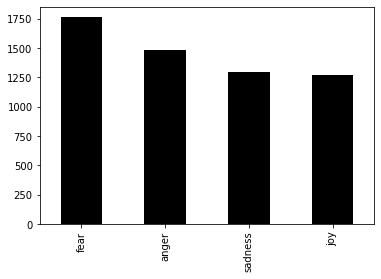

In [330]:
lexicon['AffectDimension'].value_counts().plot(kind="bar", color='k')

In [331]:
len(lexicon)

5814

In [337]:
lexicon_list = lexicon['term'].values
lexicon_set = set(lexicon_list)
len(lexicon_set)

4192

In [338]:
emotion_words = []

for i in range(0,len(lexical)):
    text = lexical[i].split()
    for token in text:
        if token in lexicon_set:
            emotion_words.append(token)

In [347]:
emotion_words[:20]

['running',
 'charity',
 'family',
 'friends',
 'celebrated',
 'love',
 'love',
 'family',
 'happy',
 'bomb',
 'happy',
 'happy',
 'optimistic',
 'morning',
 'morning',
 'shout',
 'sad',
 'weekend',
 'living',
 'curse']

In [341]:
unqiue_emotion_words = set(emotion_words)

In [342]:
print(f'Number of explicit emotion_words in the dataset:     {len(emotion_words)}')
print(f'Number of unique_emotion_words in the dataset:       {len(unqiue_emotion_words)}')

Number of explicit emotion_words in the dataset:     2812
Number of unique_emotion_words in the dataset:       702


#### Check potentially ambivalent sample token

In [343]:
for i in range(0,len(lexicon)):
    if 'kill' == lexicon['term'].iloc[i]:
        print(lexicon.iloc[i])

term               kill 
score              0.962
AffectDimension    fear 
Name: 1489, dtype: object
term               kill   
score              0.797  
AffectDimension    sadness
Name: 3351, dtype: object


In [348]:
def ambivalent_token_check(dataframe, texts, token):
    
    docs = []
    
    for i in range(0,len(data)):
        if token in texts.iloc[i]:
            docs.append(dataframe.iloc[i])
    
    return docs[:5]

In [351]:
ambivalent_token_check(data, data[TEXT], 'kill')

[Anonymized Message    You rise. You fall. Your down then you rise again. What don't kill ya make ya more strong.
 Valence1              6                                                                                         
 Valence2              5                                                                                         
 Arousal1              3                                                                                         
 Arousal2              1                                                                                         
 word_count            18                                                                                        
 stop_word_count       9                                                                                         
 unique_word_count     16                                                                                        
 url_count             0                                                                